<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [2]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
movies.shape

(979, 6)

#### Check the data type of each column.

In [12]:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [13]:
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [26]:
print(movies.sort_values('duration', ascending=False).head(1))
print(movies.sort_values('duration', ascending=True).head(1))

     star_rating   title content_rating  genre  duration  \
476          7.8  Hamlet          PG-13  Drama       242   

                                           actors_list  
476  [u'Kenneth Branagh', u'Julie Christie', u'Dere...  
     star_rating   title content_rating  genre  duration  \
389          8.0  Freaks        UNRATED  Drama        64   

                                           actors_list  
389  [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...  


#### Create a histogram of duration, choosing an "appropriate" number of bins.

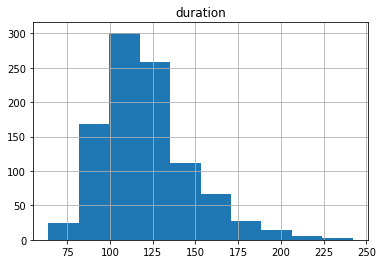

In [28]:
axes = movies.hist('duration')

#### Use a box plot to display that same data.

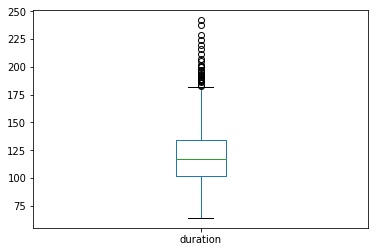

In [32]:
ax = movies.plot('star_rating',kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [33]:
movies.describe(include=['object'])

,title,content_rating,genre,actors_list
count,979,976,979,979
unique,975,12,16,969
top,The Girl with the Dragon Tattoo,R,Drama,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
freq,2,460,278,6


#### Use a visualization to display that same data, including a title and x and y labels.

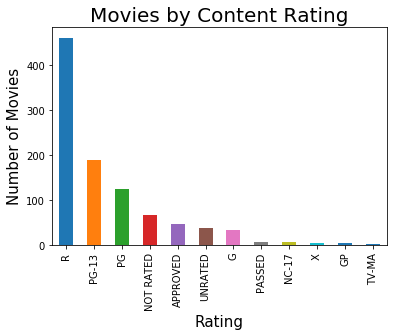

In [34]:
ax = movies.loc[:, 'content_rating'].value_counts().plot(kind = 'bar')
ax.set_title('Movies by Content Rating', fontsize=20)
ax.set_ylabel('Number of Movies', fontsize=15)
ax.set_xlabel('Rating', fontsize=15);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [35]:
movies.loc[:, 'content_rating'].replace(['NOT RATED','APPROVED','PASSED','GP'], 'UNRATED', inplace=True)

movies.loc[:, 'content_rating'].value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [36]:
movies.loc[:, 'content_rating'].replace(['X', 'TV-MA'], 'NC-17', inplace=True)

movies.loc[:, 'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [38]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [40]:
#3 null values in the content rating column

content_rating_null_mask = movies['content_rating'].isnull()
movies[content_rating_null_mask]

# change nulls to unrated

movies.loc[content_rating_null_mask, 'content_rating'] = "UNRATED"

# confirm null values were changed
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [41]:
two_hrs_or_more = movies.loc[:, 'duration'] >= 120
less_than_two_hrs = movies.loc[:, 'duration'] < 120

print('Average star rating for movies 2 hours or longer', 
      movies.loc[two_hrs_or_more, 'star_rating'].mean())

print('Average star rating for movies less than 2 hours', 
      movies.loc[less_than_two_hrs, 'star_rating'].mean())

Average star rating for movies 2 hours or longer 7.948898678414082
Average star rating for movies less than 2 hours 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

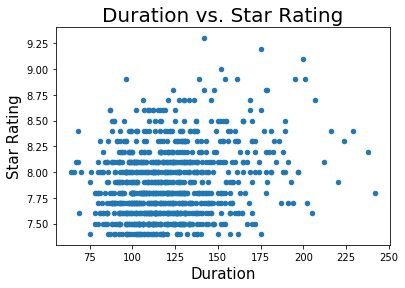

In [42]:
ax = movies.plot(kind='scatter', x = 'duration', y = 'star_rating')
ax.set_title('Duration vs. Star Rating', fontsize=20)
ax.set_xlabel('Duration', fontsize=15)
ax.set_ylabel('Star Rating', fontsize=15);

#not a relationship

#### Calculate the average duration for each genre.

In [43]:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

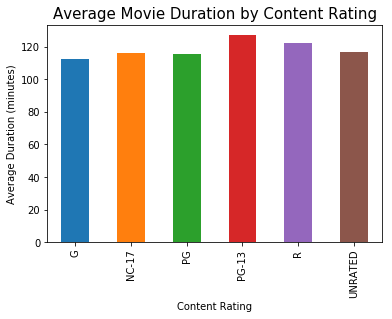

In [45]:
ax = movies.groupby('content_rating')['duration'].mean().plot(kind='bar')
ax.set_title('Average Movie Duration by Content Rating', fontsize=15)
ax.set_xlabel('Content Rating')
ax.set_ylabel('Average Duration (minutes)');

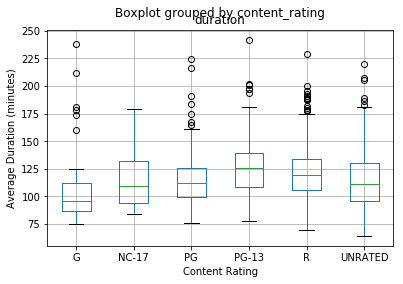

In [46]:
ax = movies.boxplot(by='content_rating', column='duration')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Average Duration (minutes)');

#### Determine the top rated movie (by star rating) for each genre.

In [47]:
movies.sort_values(by='star_rating', ascending=False).groupby('genre').first()

,star_rating,title,content_rating,duration,actors_list
genre,,,,,
Action,9.0,The Dark Knight,PG-13,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
Adventure,8.9,The Lord of the Rings: The Return of the King,PG-13,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
Animation,8.6,Spirited Away,PG,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
Biography,8.9,Schindler's List,R,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
Comedy,8.6,Modern Times,G,87,"[u'Charles Chaplin', u'Paulette Goddard', u'He..."
Crime,9.3,The Shawshank Redemption,R,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
Drama,8.9,12 Angry Men,UNRATED,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
Family,7.9,E.T. the Extra-Terrestrial,PG,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
Fantasy,7.7,The City of Lost Children,R,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [49]:
# check for duplicates
print(movies.title.duplicated().sum())

# check which movies are duplicated
movies[movies.title.duplicated()]

movies.loc[movies.loc[:, 'title'].isin(['Dracula','The Girl with the Dragon Tattoo', 
                                             'Les Miserables', 'True Grit']), :]

4


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [50]:
count_by_genre = movies.groupby('genre')['star_rating'].agg(['count','mean'])
count_by_genre.loc[(count_by_genre['count'] >= 10), :]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!